In [56]:
using CSV, DataFrames, Dates, TSFrames, Statistics, PortfolioAnalytics, LinearAlgebra, TimerOutputs, NearestCorrelationMatrix, NaNStatistics

# Create a TimerOutput, this will store all our timing information
#const to = TimerOutput();

In [57]:
function load_stocks(data_dir::String, stock_files::Vector{String})
    combined_df = DataFrame()  # Create an empty DataFrame to store the combined data
    
    # Iterate over each stock file
    for file in stock_files
        path = joinpath(data_dir, file)  # Get the full path of the file
        
        if isfile(path)
            # Load the CSV file into a DataFrame
            df = CSV.read(path, DataFrame)
            
            # Select required columns (including the ticker symbol)
            select!(df, [:Date, :Ticker, :Close, :Sector])
            
            # Append the DataFrame to the combined DataFrame
            append!(combined_df, df)
        else
            println("File not found: $file")  # Print an error if file is missing
        end
    end
    
    return combined_df
end

load_stocks (generic function with 1 method)

In [58]:
# Specify the data directory and list of stock files to load
data_dir = "C:/Users/Z2005081/Downloads/COPY FROM SCHOOL PC/DATA_MINNER/FULL_2020_2025_11_SECTION"
stock_files = [
    "Consumer_Discretionary.csv", "Consumer_Staples.csv", "Energy.csv",
    "Financials.csv", "Health_Care.csv", "Industrials.csv",         # Note: It must be UFT-8 CSV
    "Information_Technology.csv", "Materials.csv", "Real_Estate.csv", "Communication_Services.csv", "Utilities.csv"
]

# Call the function to load the stocks
combined_df = load_stocks(data_dir, stock_files)

# Display the combined DataFrame
println("\nStock Data:\n")
show(combined_df)


Stock Data:

716100×4 DataFrame
    Row │ Date                       Ticker   Close    Sector                 
        │ String31                   String7  Float64  String31               
────────┼─────────────────────────────────────────────────────────────────────
      1 │ 2020-01-02 00:00:00-05:00  AMZN     94.9005  Consumer Discretionary
      2 │ 2020-01-03 00:00:00-05:00  AMZN     93.7485  Consumer Discretionary
      3 │ 2020-01-06 00:00:00-05:00  AMZN     95.144   Consumer Discretionary
      4 │ 2020-01-07 00:00:00-05:00  AMZN     95.343   Consumer Discretionary
      5 │ 2020-01-08 00:00:00-05:00  AMZN     94.5985  Consumer Discretionary
      6 │ 2020-01-09 00:00:00-05:00  AMZN     95.0525  Consumer Discretionary
      7 │ 2020-01-10 00:00:00-05:00  AMZN     94.158   Consumer Discretionary
      8 │ 2020-01-13 00:00:00-05:00  AMZN     94.565   Consumer Discretionary
      9 │ 2020-01-14 00:00:00-05:00  AMZN     93.472   Consumer Discretionary
     10 │ 2020-01-15 00:00:0

In [59]:
df = DataFrame(combined_df)

# Group by sector and count the number of stocks in each sector
sector_counts = combine(groupby(df, :Sector), DataFrames.nrow => :Count)

# Display the count of stocks in each sector
println("\nNumber of Stocks in Each Sector:\n")
show(sector_counts, allrows=true, allcols=true)



Number of Stocks in Each Sector:

11×2 DataFrame
 Row │ Sector                  Count 
     │ String31                Int64 
─────┼───────────────────────────────
   1 │ Consumer Discretionary  65100
   2 │ Consumer Staples        65100
   3 │ Energy                  65100
   4 │ Financials              65100
   5 │ Health Care             65100
   6 │ Industrials             65100
   7 │ Information Technology  65100
   8 │ Materials               65100
   9 │ Real Estate             65100
  10 │ Communication Services  65100
  11 │ Utilities               65100

In [60]:
df = DataFrame(combined_df)

# Group by sector and count the number of unique tickers in each sector
sector_ticker_counts = combine(groupby(df, :Sector), :Ticker => (tickers -> length(unique(tickers))) => :Ticker_Count)

# Display the count of unique tickers in each sector
println("\nNumber of Unique Tickers in Each Sector:\n")
show(sector_ticker_counts, allrows=true, allcols=true)



Number of Unique Tickers in Each Sector:

11×2 DataFrame
 Row │ Sector                  Ticker_Count 
     │ String31                Int64        
─────┼──────────────────────────────────────
   1 │ Consumer Discretionary            50
   2 │ Consumer Staples                  50
   3 │ Energy                            50
   4 │ Financials                        50
   5 │ Health Care                       50
   6 │ Industrials                       50
   7 │ Information Technology            50
   8 │ Materials                         50
   9 │ Real Estate                       50
  10 │ Communication Services            50
  11 │ Utilities                         50

In [61]:
# Count the number of unique stocks (replace "Ticker" with the actual column name)
num_stocks = length(unique(combined_df.Ticker))
println("\nNumber of unique stocks: ", num_stocks)


Number of unique stocks: 550


In [62]:
println("Unique tickers in daily_df: ", length(unique(combined_df.Ticker)))

Unique tickers in daily_df: 550


In [63]:
# Extract and print all unique tickers (replace "Ticker" with your actual column name)
unique_tickers = sort(unique(combined_df.Ticker))  # Sorting for easier reading
println("\nUnique Stock Tickers:")
for ticker in unique_tickers
    println(ticker)
end

# Print the total number of unique tickers
println("\nTotal number of unique stocks: ", length(unique_tickers))


Unique Stock Tickers:
A
AA
AAL
AAP
AAPL
ABBV
ABT
ACN
ADBE
ADC
ADI
ADM
ADP
AEE
AEP
AES
AFL
AIG
AJG
AKAM
ALB
ALE
ALGN
ALL
ALLE
ALLY
AMAT
AMD
AMGN
AMP
AMT
AMX
AMZN
ANSS
AOS
APA
APD
APH
AR
ARE
ARTNA
ASH
ATI
ATO
ATUS
AVA
AVB
AVGO
AVT
AVY
AWK
AWR
AXP
AZO
BA
BAC
BALL
BBY
BCPC
BDX
BEN
BG
BHP
BIDU
BIIB
BILI
BIO
BK
BKH
BKNG
BKR
BLK
BMY
BP
BR
BRX
BSX
BURL
BXP
C
CABO
CACC
CAG
CAH
CASY
CAT
CB
CBT
CC
CCI
CCOI
CDNS
CE
CF
CFG
CHD
CHTR
CHWY
CHX
CI
CL
CLF
CLX
CMC
CMCSA
CME
CMG
CMI
CMS
CNC
CNP
CNQ
COF
COP
COST
COTY
CPB
CPT
CRM
CSCO
CSX
CTAS
CTRA
CTSH
CTVA
CUBE
CVE
CVS
CVX
CWT
CZR
D
DAL
DAR
DD
DE
DEA
DEI
DEO
DFS
DG
DGX
DHI
DHR
DINO
DIS
DLR
DNP
DOC
DOV
DOW
DOYU
DRI
DTE
DUK
DVA
DVN
DXC
E
EA
EBAY
EC
ECL
ED
EFX
EGP
EIX
EL
ELV
EMN
EMR
ENB
EOG
EQIX
EQNR
EQR
EQT
ES
ESS
ETN
ETSY
EVRG
EW
EXC
EXP
EXPD
EXR
F
FANG
FAST
FCX
FDP
FDS
FDX
FE
FIS
FITB
FIZZ
FLO
FLS
FMC
FND
FOX
FR
FRT
FTI
FTNT
FUL
FWONA
GD
GE
GILD
GIS
GLW
GM
GMRE
GNE
GOOG
GPC
GPN
GRMN
GS
GWW
HAIN
HAL
HAS
HBAN
HCA
HD
HE
HES
HII
HIW
HLT
HOLX
HON
HP
HPQ
HR
HR

In [64]:
# Extract unique tickers from the combined DataFrame
tickers = unique(combined_df.Ticker)

# Filter the combined DataFrame by the extracted tickers
filtered_df = filter(:Ticker => t -> t in tickers, combined_df)

# Select only the required columns
filtered_df = filtered_df[:, ["Date", "Ticker", "Close"]]

# Correctly parse the DateTime with the specified format
filtered_df[!, "Date"] = DateTime.(filtered_df.Date, "yyyy-mm-dd HH:MM:SS-HH:MM")

# Define the date range for filtering
start_date = DateTime("2020-01-02")
end_date = DateTime("2025-03-08")


# Filter the DataFrame for the specified date range
daily_df = filter(row -> start_date <= row.Date <= end_date, filtered_df)

# Sort the DataFrame by Date and Ticker
sort!(daily_df, [:Date, :Ticker])


Row,Date,Ticker,Close
,DateTime,String7,Float64
1,2020-01-02T05:00:00,A,83.0613
2,2020-01-02T05:00:00,AA,20.6555
3,2020-01-02T05:00:00,AAL,28.9829
4,2020-01-02T05:00:00,AAP,143.805
5,2020-01-02T05:00:00,AAPL,72.7161
6,2020-01-02T05:00:00,ABBV,71.5898
7,2020-01-02T05:00:00,ABT,79.2739
8,2020-01-02T05:00:00,ACN,195.264
9,2020-01-02T05:00:00,ADBE,334.43


In [65]:
# Pivot the DataFrame to get the desired format, handling duplicates by taking the mean
pivoted_df = unstack(daily_df, :Date, :Ticker, :Close, combine = mean)

# Sort by Date (Index)
sort!(pivoted_df, :Date)

# Convert the DataFrame to a TSFrame
tsframe = TSFrame(pivoted_df, :Date)


1302×550 TSFrame with DateTime Index
 Index                A         AA        AAL       AAP       AAPL      ABBV   ⋯
 DateTime             Float64?  Float64?  Float64?  Float64?  Float64?  Float6 ⋯
────────────────────────────────────────────────────────────────────────────────
 2020-01-02T05:00:00   83.0613   20.6555   28.9829   143.805   72.7161   71.58 ⋯
 2020-01-03T05:00:00   81.7277   20.7326   27.5482   143.814   72.0091   70.91
 2020-01-06T05:00:00   81.9693   20.2505   27.2194   141.451   72.5829   71.46
 2020-01-07T05:00:00   82.2206   20.559    27.1198   139.773   72.2416   71.06
 2020-01-08T05:00:00   83.0323   19.7297   27.7375   138.167   73.4036   71.56 ⋯
 2020-01-09T05:00:00   84.337    19.1029   27.8471   137.905   74.9628   72.11
 2020-01-10T05:00:00   84.6462   18.7558   27.2194   134.423   75.1323   71.19
 2020-01-13T05:00:00   84.5206   18.9101   27.2892   131.04    76.7374   70.76
 2020-01-14T05:00:00   85.0328   19.6429   27.4286   134.324   75.7012   71.46 ⋯
 20

In [66]:
all_tickers = unique(daily_df.Ticker)
pivoted_df = unstack(daily_df, :Date, :Ticker, :Close, combine = mean)
for ticker in setdiff(all_tickers, names(pivoted_df)[2:end])
    pivoted_df[!, ticker] = fill(NaN, nrow(pivoted_df))
end

In [67]:
# Calculate the log returns for each stock
asset_returns = asset_return(tsframe, method = "log")

# Extract returns as vectors for correlation analysis
returns_vectors = Dict(ticker => collect(skipmissing(asset_returns[:, ticker])) for ticker in names(asset_returns)[1:end])

# Convert the returns vectors to a DataFrame for better visualization
returns_df = DataFrame(returns_vectors)


Row,A,AA,AAL,AAP,AAPL,ABBV,ABT,ACN,ADBE,ADC,ADI,ADM,ADP,AEE,AEP,AES,AFL,AIG,AJG,AKAM,ALB,ALE,ALGN,ALL,ALLE,ALLY,AMAT,AMD,AMGN,AMP,AMT,AMX,AMZN,ANSS,AOS,APA,APD,APH,AR,ARE,ARTNA,ASH,ATI,ATO,ATUS,AVA,AVB,AVGO,AVT,AVY,AWK,AWR,AXP,AZO,BA,BAC,BALL,BBY,BCPC,BDX,BEN,BG,BHP,BIDU,BIIB,BILI,BIO,BK,BKH,BKNG,BKR,BLK,BMY,BP,BR,BRX,BSX,BURL,BXP,C,CABO,CACC,CAG,CAH,CASY,CAT,CB,CBT,CC,CCI,CCOI,CDNS,CE,CF,CFG,CHD,CHTR,CHWY,CHX,CI,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,-0.0161859,0.00372787,-0.0507687,6.26014e-5,-0.00976959,-0.0095374,-0.0122657,-0.00166696,-0.00786506,0.0233728,-0.0177604,-0.00195348,-0.00211588,0.000394314,-0.0010705,-0.0115492,-0.00695953,-0.00775795,-0.00209632,-0.00457459,-0.0144269,0.00198535,-0.011487,8.85068e-5,-0.0124383,-0.0108005,-0.0160446,-0.0102355,-0.00681193,-0.0125467,0.000481323,-0.00123101,-0.0122133,-0.0101441,-0.00883081,0.0129286,-0.0224887,-0.0104914,0.034159,0.00568113,-0.00244992,-0.0153598,-0.00437851,0.00659177,-0.00893661,0.00378442,0.00955646,-0.0257642,-0.0167596,-0.00620578,0.0064682,0.00789164,-0.0099822,-0.00148042,-0.00168143,-0.020982,0.0138363,-0.00148987,0.00650834,-0.0108831,-0.0205136,0.00658005,-0.00675988,-0.0325005,-0.011588,0.0525335,-0.0145617,-0.0128473,-0.00379046,-0.00439608,0.00117016,-0.0106862,-0.00888051,0.0179297,0.000807462,0.00802235,-0.00775117,-0.00196544,0.00778776,-0.0190154,0.0109742,-0.0157294,-0.00866051,-0.0146809,0.0111915,-0.0139812,-0.00153929,-0.0166993,-0.069151,0.0054904,0.0180049,-0.0143807,-0.0136814,-0.00692055,-0.0208292,0.0034213,0.00820394,-0.00949806,-0.00237878,-0.00862488,⋯
2,0.0029518,-0.0235305,-0.0120067,-0.0165713,0.00793653,0.0078607,0.00522526,-0.00655134,0.00570982,0.0103416,-0.0118184,-0.00785335,0.00135238,0.0009195,0.00331488,0.0115492,-0.00283507,0.000778381,0.00460581,0.00354718,-0.00111815,-0.0034768,0.0192124,0.00292085,-0.00185905,-0.0132498,-0.0218007,-0.00433033,0.00764462,0.00328561,-0.0002624,-0.00493816,0.0147759,-0.00930496,0.00631582,-0.00194829,-0.000442377,-0.00519443,-0.0226425,0.00242475,0.000545204,-0.0110409,-0.0201927,-0.00135085,0.0117795,0.000839141,0.00167144,-0.0014971,-0.0110104,-0.012686,-0.00190302,-0.0187861,-0.00434332,-0.0189241,0.00294067,-0.00143387,-0.00930699,0.00833834,0.00232107,0.0139603,0.00793986,-0.00727514,-0.00110058,0.0158675,-0.000103147,0.049911,0.0142123,0.00930623,0.000392763,-0.00879192,-0.00469089,0.000853443,0.00318066,0.025929,0.0090006,0.00915871,0.00819221,0.0135915,0.00700141,-0.00314157,0.0108421,0.00265788,0.00538423,0.00827211,0.0203094,-0.000673915,0.00818346,-0.00584579,0.0175961,-0.00845933,0.014588,0.00608766,-0.0110813,-0.00173769,-0.00527575,0.00383504,0.00600859,0.001022,0.00267564,0.0182401,⋯
3,0.00306068,0.0151229,-0.00366705,-0.0119329,-0.00471395,-0.00572072,-0.00557479,-0.0218264,-0.000959307,0.000142871,0.0224957,-0.0121188,-0.012178,0.00367038,0.000213483,0.00348884,-0.00950947,-0.00565794,-0.0108155,0.0298193,0.0130629,-0.0108796,-0.00991328,-0.00860915,-0.0120454,-0.00904369,0.0284769,-0.00289734,-0.00944944,-0.0121205,-0.0215386,-0.0149628,0.00208944,0.00813687,-0.0067385,0.237394,0.0042407,0.00537949,0.0226425,-0.0332746,-0.00683395,0.00213787,0.0108858,0.00664684,0.0147942,-0.00715489,-0.0219983,-0.00344845,0.014100

In [68]:
# Convert the DataFrame to a matrix
returns_matrix = Matrix(returns_df)

1301×550 Matrix{Float64}:
 -0.0161859     0.00372787   -0.0507687   …  -0.0211773     0.000149
  0.0029518    -0.0235305    -0.0120067       0.0441933    -0.00770718
  0.00306068    0.0151229    -0.00366705      0.02222       0.00337452
  0.00982453   -0.0411738     0.0225219       0.00899974   -0.00217363
  0.0155901    -0.0322847     0.00394341      0.000964382   0.0131923
  0.00366022   -0.0183398    -0.0227982   …   0.0064511     0.00376903
 -0.0014855     0.00819257    0.00255895      0.0127789     0.00690948
  0.00604186    0.0380235     0.0050984      -0.0118215     0.00555206
  0.00713438   -0.0093709     0.00181449      0.0503771     0.00920914
  0.00943384   -0.126618      0.0232944      -0.0108463     0.00648478
  0.00735077   -0.00507464    0.00600385  …  -0.00725266    0.00658564
 -0.00567519   -0.0327523    -0.0431721       0.0153658     0.0125495
  0.005786     -0.0314474     0.004402       -0.0156305    -0.00303439
  ⋮                                       ⋱            

In [69]:
using Random
# Function to randomly delete data (set to NaN)
function delete_random_data!(matrix::Matrix{Float64}, fraction::Float64)
    Random.seed!(5)  # For reproducibility
    for i in 1:size(matrix, 1)
        for j in 1:size(matrix, 2)
            if rand() < fraction
                matrix[i, j] = NaN
            end
        end
    end
    return matrix
end

# Apply the deletion (e.g., % of values set to NaN)
delete_random_data!(returns_matrix, 0.05)
println("Number of NaNs after deletion: ", sum(isnan.(returns_matrix)))            

Number of NaNs after deletion: 35575


In [70]:
returns_matrix

1301×550 Matrix{Float64}:
  -0.0161859     0.00372787   NaN           …   -0.0211773      0.000149
   0.0029518    -0.0235305     -0.0120067        0.0441933     -0.00770718
   0.00306068    0.0151229     -0.00366705       0.02222        0.00337452
   0.00982453   -0.0411738      0.0225219        0.00899974    -0.00217363
   0.0155901    -0.0322847      0.00394341       0.000964382    0.0131923
   0.00366022   -0.0183398     -0.0227982   …    0.0064511      0.00376903
  -0.0014855     0.00819257     0.00255895       0.0127789      0.00690948
   0.00604186    0.0380235      0.0050984       -0.0118215      0.00555206
   0.00713438   -0.0093709      0.00181449       0.0503771      0.00920914
   0.00943384   -0.126618       0.0232944       -0.0108463      0.00648478
 NaN            -0.00507464     0.00600385  …   -0.00725266     0.00658564
  -0.00567519   -0.0327523     -0.0431721        0.0153658      0.0125495
   0.005786     -0.0314474      0.004402        -0.0156305     -0.00303439
   

In [71]:
A = nancor(returns_matrix)

550×550 Matrix{Float64}:
 1.0       0.340642   0.288215   …  0.399539   0.213307    0.582269
 0.340642  1.0        0.459455      0.317988   0.0268835   0.304331
 0.288215  0.459455   1.0           0.298462   0.0145783   0.23831
 0.333384  0.303316   0.258125      0.227116   0.0569475   0.307218
 0.485336  0.313524   0.298157      0.402377   0.258654    0.534963
 0.349855  0.185339   0.148685   …  0.172999  -0.0108986   0.391412
 0.559182  0.191057   0.203139      0.285105   0.123196    0.572539
 0.539698  0.380731   0.334112      0.360359   0.200327    0.544943
 0.481056  0.24372    0.204581      0.414986   0.333304    0.486516
 0.345422  0.312261   0.313489      0.367774   0.0107338   0.444172
 0.529791  0.420217   0.385583   …  0.436308   0.234276    0.446148
 0.344639  0.435383   0.314784      0.165934  -0.0485612   0.297016
 0.494257  0.354399   0.36242       0.342993   0.0596313   0.545138
 ⋮                               ⋱                         
 0.503338  0.502743   0.47999   

In [72]:
eigvals(A)

550-element Vector{Float64}:
  -0.22333730103235372
  -0.16655902010335405
  -0.1562986322977499
  -0.15396294833561566
  -0.14062743860315216
  -0.13767721255689258
  -0.12220875184389073
  -0.11488080322322818
  -0.10263354272727392
  -0.0873304645202402
  -0.08224932606415107
  -0.07834119067023303
  -0.07201306344070031
   ⋮
   3.9704344434584584
   4.419144979305836
   4.689904704583216
   4.992004136916442
   5.666605340736656
   6.070578047321757
   7.8474796522757355
   9.512852745099657
  12.312529147307963
  24.988772113170413
  32.850208971513624
 210.58542732818393

In [73]:
using LinearAlgebra

# Symmetrized result already computed
x = eigvals(Symmetric(A))

# Count positive and negative eigenvalues
count_positive = sum(x .> 1e-8)  # Positive, above tolerance
count_negative = sum(x .< -1e-8) # Negative, below tolerance
count_zero = sum(abs.(x) .<= 1e-8)  # Effectively zero

# Print results
println("Number of positive eigenvalues: ", count_positive)
println("Number of negative eigenvalues: ", count_negative)
println("Number of zero eigenvalues: ", count_zero)
println("Is positive semi-definite: ", all(x .>= -1e-8))

Number of positive eigenvalues: 489
Number of negative eigenvalues: 61
Number of zero eigenvalues: 0
Is positive semi-definite: false


In [74]:
using LinearAlgebra
using Random
using TimerOutputs

In [75]:
# Function to project onto the PSD matrix
function Project_onto_PSD(A_symm::Matrix{Float64})::Matrix{Float64}
    λ, V = eigen(Symmetric(A_symm))  # Eigenvalue decomposition
    λ[λ .< 0] .= 0.0  # Set all negative eigenvalues exactly to zero
    return V * Diagonal(λ) * V'  # Reconstruct PSD matrix
end

Project_onto_PSD (generic function with 1 method)

In [76]:
# Function to project onto the unit diagonal (in-place modification)
function project_onto_UD!(A_symm::Matrix{Float64})::Matrix{Float64}
    for i in 1:size(A_symm,1)
        A_symm[i,i] = 1.0
    end
    return A_symm
end

project_onto_UD! (generic function with 1 method)

In [77]:
# Function for POCS with Dykstra's Correction
function nearest_corr_dykstra(A_symm::Matrix{Float64}, tol::Float64=1e-8, max_iter::Int=1000000)
    Y_k = copy(A_symm)
    ΔS_k = zeros(size(A_symm))

    for k in 1:max_iter
        R_k = Y_k - ΔS_k
        X_k = Project_onto_PSD(R_k)
        ΔS_k = X_k - R_k
        Y_k = project_onto_UD!(copy(X_k))  # Ensure no in-place modification to X_k

        # Convergence check (relative error)
        if norm(Y_k - X_k, Inf) / norm(Y_k, Inf) <= tol
            println("Converged after $k iterations")
            return Y_k, k
        end
    end
    println("Reached maximum iterations ($max_iter) without convergence")
    return Y_k, max_iter
end

nearest_corr_dykstra (generic function with 3 methods)

In [78]:

A_symm = A

# Run the nearest correlation matrix function
to = TimerOutput()  # Initialize timing
println("=== POCS with Dykstra ===")

@timeit to "POCS with Dykstra" begin
    result, iterations = nearest_corr_dykstra(A_symm)
end

show(to)

# Verify the result is PSD
min_eigenval = minimum(eigen(Symmetric(result)).values)
println("")
println("Minimum Eigenvalue after projection: ", min_eigenval)
result

=== POCS with Dykstra ===
Converged after 17 iterations
──────────────────────────────────────────────────────────────────────────────
                                     Time                    Allocations      
                            ───────────────────────   ────────────────────────
     Tot / % measured:           2.92s /  99.9%            374MiB / 100.0%    

Section             ncalls     time    %tot     avg     alloc    %tot      avg
──────────────────────────────────────────────────────────────────────────────
POCS with Dykstra        1    2.92s  100.0%   2.92s    374MiB  100.0%   374MiB
──────────────────────────────────────────────────────────────────────────────
Minimum Eigenvalue after projection: -2.6419869192325363e-9


550×550 Matrix{Float64}:
 1.0       0.340548   0.28895   0.332536   …  0.398846   0.213879    0.58294
 0.340548  1.0        0.460083  0.302782      0.318136   0.0271505   0.304581
 0.28895   0.460083   1.0       0.258582      0.297967   0.015302    0.238164
 0.332536  0.302782   0.258582  1.0           0.227602   0.0576898   0.307609
 0.485938  0.313627   0.297304  0.299401      0.402017   0.259275    0.535382
 0.349927  0.185094   0.148097  0.257609   …  0.172888  -0.0117661   0.391673
 0.559688  0.191002   0.202462  0.261994      0.285007   0.123296    0.572321
 0.538775  0.380319   0.335669  0.353961      0.360506   0.199674    0.544515
 0.481628  0.243696   0.204007  0.272253      0.415024   0.333904    0.486748
 0.345212  0.311685   0.314078  0.33117       0.366705   0.0107489   0.443751
 0.529797  0.420421   0.384126  0.298265   …  0.436291   0.234735    0.445799
 0.343802  0.434959   0.31485   0.302067      0.166942  -0.0492195   0.297252
 0.494027  0.354456   0.361709  0.363391

In [79]:
eigvals(result)

550-element Vector{Float64}:
  -2.6419869174686373e-9
  -2.1887471199356837e-9
  -1.9655159441162593e-9
  -1.3908685447088794e-9
  -4.081172831833184e-10
  -3.747452913931969e-10
  -2.908674768928398e-10
  -2.3679333243261236e-10
  -2.1450298663044546e-10
  -1.9511596590597862e-10
  -1.7038889391507162e-10
  -1.542175569124943e-10
  -1.4917173214686205e-10
   ⋮
   3.9637201320617703
   4.412952029649393
   4.6834153463126205
   4.984557810988761
   5.659719120275219
   6.065083099056394
   7.8414508888804715
   9.504996746174994
  12.303266076407565
  24.982468134788952
  32.84155797573563
 210.5779442328971

In [80]:
norm(A-result)

0.5640544975378494

Checking data...
Eigenvalues of A: min = -0.22333730103235372, max = 210.58542732818393
Eigenvalues of result: min = -2.6419868926897005e-9, max = 210.5779442328971
Attempting to display plot with PyPlot...


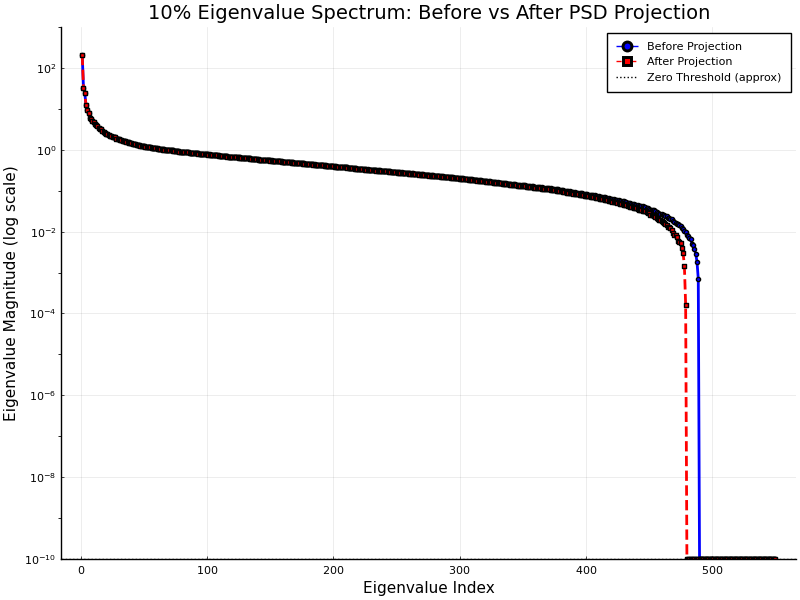

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


Saving to 'eigenvalue_spectrum_pyplot.png'...


sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


Saved. Check 'eigenvalue_spectrum_pyplot.png'.


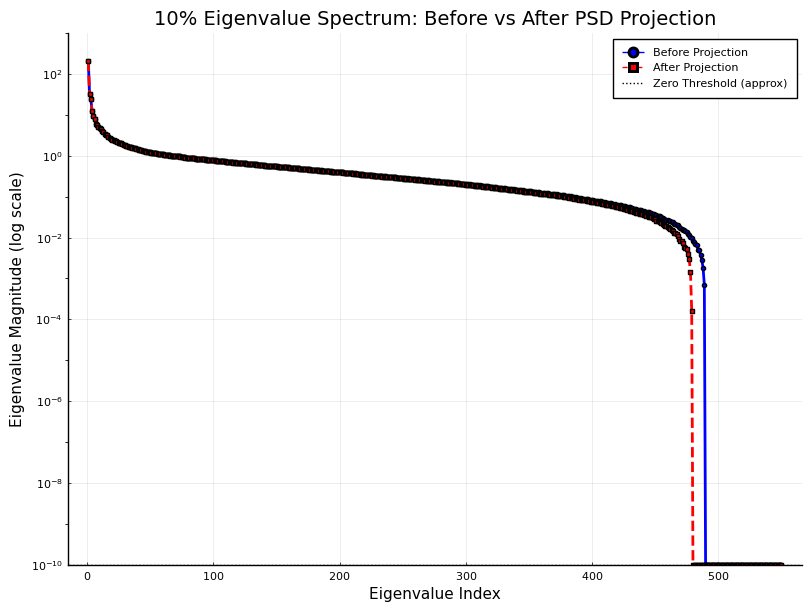

In [81]:
using Plots, LinearAlgebra, PyPlot

# Set PyPlot backend
Plots.pyplot()  # Switch to PyPlot backend
Plots.default(size=(800, 600))  # Set plot size

# Verify data
println("Checking data...")
@assert isdefined(Main, :A) "Matrix A is not defined!"
@assert isdefined(Main, :result) "Matrix result is not defined!"

# Compute and sort eigenvalues
eigvals_A = sort(eigvals(Symmetric(A)), rev=true)
eigvals_result = sort(eigvals(Symmetric(result)), rev=true)

println("Eigenvalues of A: min = ", minimum(eigvals_A), ", max = ", maximum(eigvals_A))
println("Eigenvalues of result: min = ", minimum(eigvals_result), ", max = ", maximum(eigvals_result))

# Shift negatives for log scale
eigvals_A_plot = max.(eigvals_A, 1e-10)
eigvals_result_plot = max.(eigvals_result, 1e-10)

# Create the plot
p = Plots.plot(
    eigvals_A_plot,
    label="Before Projection",
    color=:blue,
    linewidth=2,
    marker=:circle,
    markersize=3,
    yscale=:log10,
    title="10% Eigenvalue Spectrum: Before vs After PSD Projection",
    xlabel="Eigenvalue Index",
    ylabel="Eigenvalue Magnitude (log scale)",
    grid=true,
    legend=:topright,
    ylims=(1e-10, 1e3),
    yticks=10.0 .^ (-10:2:2)  # [1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e0, 1e2]
)

Plots.plot!(
    eigvals_result_plot,
    label="After Projection",
    color=:red,
    linewidth=2,
    linestyle=:dash,
    marker=:square,
    markersize=3
)

Plots.hline!([1e-10], label="Zero Threshold (approx)", color=:black, linestyle=:dot, linewidth=1)

# Display and save
println("Attempting to display plot with PyPlot...")
display(p)
println("Saving to 'eigenvalue_spectrum_pyplot.png'...")
Plots.savefig(p, "eigenvalue_spectrum_pyplot.png")
println("Saved. Check 'eigenvalue_spectrum_pyplot.png'.")

In [82]:
using LinearAlgebra

# Symmetrized result already computed
x = eigvals(Symmetric(result))

# Count positive and negative eigenvalues
count_positive = sum(x .> 1e-8)  # Positive, above tolerance
count_negative = sum(x .< -1e-8) # Negative, below tolerance
count_zero = sum(abs.(x) .<= 1e-8)  # Effectively zero

# Print results
println("Number of positive eigenvalues: ", count_positive)
println("Number of negative eigenvalues: ", count_negative)
println("Number of zero eigenvalues: ", count_zero)
println("Is positive semi-definite: ", all(x .>= -1e-8))

Number of positive eigenvalues: 479
Number of negative eigenvalues: 0
Number of zero eigenvalues: 71
Is positive semi-definite: true


In [83]:
rank(result)

511

In [84]:
# Enforce small eigenvalues to be a small positive value
function enforce_small_eigenvalues_positive!(matrix::Matrix{Float64}, threshold::Float64=1e-8, small_positive::Float64=1e-15)
    λ, V = eigen(Symmetric(matrix))
    λ[λ .< threshold] .= small_positive
    matrix .= V * Diagonal(λ) * V'
    return Symmetric(matrix)
end

enforce_small_eigenvalues_positive! (generic function with 3 methods)

In [85]:
# Function to project onto the unit diagonal (in-place modification)
function project_onto_UD!(A::Matrix{Float64})::Matrix{Float64}
    for i in 1:size(A, 1)
        A[i, i] = 1.0
    end
    return A
end

project_onto_UD! (generic function with 1 method)

In [86]:
# Function to project onto the PSD cone
function Project_onto_PSD(matrix::Matrix{Float64})::Matrix{Float64}
    λ, V = eigen(Symmetric(matrix))
    λ[λ .< 0] .= 0
    return V * Diagonal(λ) * V'
end

Project_onto_PSD (generic function with 1 method)

In [87]:
# Function for POCS with Dykstra's Correction
function nearest_corr_dykstra(A::Matrix{Float64}, tol::Float64=1e-8, max_iter::Int=10000)
    Y_k = copy(A)
    ΔS_k = zeros(size(A))

    for k in 1:max_iter
        R_k = Y_k - ΔS_k
        X_k = @timeit to "proj_PSD" Project_onto_PSD(R_k)
        ΔS_k = X_k - R_k
        Y_k = @timeit to "proj_UD" project_onto_UD!(copy(X_k))  # Ensure no in-place modification to X_k

        # Convergence check: Ensure changes are small
        if norm(Y_k - X_k, Inf) <= tol * max(norm(Y_k, Inf), eps(Float64))
            println("Converged after $k iterations")
            return Y_k, k
        end
    end
    println("Reached maximum iterations ($max_iter) without convergence")
    return Y_k, max_iter
end

nearest_corr_dykstra (generic function with 3 methods)

In [88]:
A_symm = A
to = TimerOutput()  # Initialize timing
println("=== POCS with Dykstra ===")
@timeit to "POCS with Dykstra" begin
    result6, iterations = nearest_corr_dykstra(A_symm)
end

show(to) 

# Verify the result is PSD
min_eigenval = minimum(eigen(Symmetric(result6)).values)


println(" ")
 println("Minimum Eigenvalue after projection: ", min_eigenval)

# Apply the function to the result matrix
result6

=== POCS with Dykstra ===
Converged after 17 iterations
──────────────────────────────────────────────────────────────────────────────
                                     Time                    Allocations      
                            ───────────────────────   ────────────────────────
     Tot / % measured:           3.15s /  99.9%            373MiB / 100.0%    

Section             ncalls     time    %tot     avg     alloc    %tot      avg
──────────────────────────────────────────────────────────────────────────────
POCS with Dykstra        1    3.14s  100.0%   3.14s    373MiB  100.0%   373MiB
  proj_PSD              17    2.48s   78.8%   146ms    200MiB   53.4%  11.7MiB
  proj_UD               17   25.0ms    0.8%  1.47ms   39.2MiB   10.5%  2.31MiB
 ──────────────────────────────────────────────────────────────────────────────
Minimum Eigenvalue after projection: -2.6419869192325363e-9


550×550 Matrix{Float64}:
 1.0       0.340548   0.28895   0.332536   …  0.398846   0.213879    0.58294
 0.340548  1.0        0.460083  0.302782      0.318136   0.0271505   0.304581
 0.28895   0.460083   1.0       0.258582      0.297967   0.015302    0.238164
 0.332536  0.302782   0.258582  1.0           0.227602   0.0576898   0.307609
 0.485938  0.313627   0.297304  0.299401      0.402017   0.259275    0.535382
 0.349927  0.185094   0.148097  0.257609   …  0.172888  -0.0117661   0.391673
 0.559688  0.191002   0.202462  0.261994      0.285007   0.123296    0.572321
 0.538775  0.380319   0.335669  0.353961      0.360506   0.199674    0.544515
 0.481628  0.243696   0.204007  0.272253      0.415024   0.333904    0.486748
 0.345212  0.311685   0.314078  0.33117       0.366705   0.0107489   0.443751
 0.529797  0.420421   0.384126  0.298265   …  0.436291   0.234735    0.445799
 0.343802  0.434959   0.31485   0.302067      0.166942  -0.0492195   0.297252
 0.494027  0.354456   0.361709  0.363391

In [89]:
eigvals(result6)

550-element Vector{Float64}:
  -2.6419869174686373e-9
  -2.1887471199356837e-9
  -1.9655159441162593e-9
  -1.3908685447088794e-9
  -4.081172831833184e-10
  -3.747452913931969e-10
  -2.908674768928398e-10
  -2.3679333243261236e-10
  -2.1450298663044546e-10
  -1.9511596590597862e-10
  -1.7038889391507162e-10
  -1.542175569124943e-10
  -1.4917173214686205e-10
   ⋮
   3.9637201320617703
   4.412952029649393
   4.6834153463126205
   4.984557810988761
   5.659719120275219
   6.065083099056394
   7.8414508888804715
   9.504996746174994
  12.303266076407565
  24.982468134788952
  32.84155797573563
 210.5779442328971

In [90]:
using NearestCorrelationMatrix
online1 = nearest_cor(A, AlternatingProjections())

550×550 Matrix{Float64}:
 1.0       0.340548   0.28895   0.332536   …  0.398846   0.213879    0.58294
 0.340548  1.0        0.460083  0.302782      0.318136   0.0271505   0.304581
 0.28895   0.460083   1.0       0.258582      0.297967   0.015302    0.238164
 0.332536  0.302782   0.258582  1.0           0.227602   0.0576898   0.307609
 0.485938  0.313627   0.297304  0.299401      0.402017   0.259275    0.535382
 0.349927  0.185094   0.148097  0.257609   …  0.172888  -0.0117661   0.391673
 0.559688  0.191002   0.202462  0.261994      0.285007   0.123296    0.572321
 0.538775  0.380319   0.335669  0.353961      0.360506   0.199674    0.544515
 0.481628  0.243696   0.204007  0.272253      0.415024   0.333904    0.486748
 0.345212  0.311685   0.314078  0.33117       0.366705   0.0107489   0.443751
 0.529797  0.420421   0.384126  0.298265   …  0.436291   0.234735    0.445799
 0.343802  0.434959   0.31485   0.302067      0.166942  -0.0492195   0.297252
 0.494027  0.354456   0.361709  0.363391

In [91]:
eigvals(online1)

550-element Vector{Float64}:
   1.4901155428771994e-8
   1.4901156807563305e-8
   1.4901157251342491e-8
   1.4901157490735466e-8
   1.4901157581270857e-8
   1.4901157878145272e-8
   1.4901157986978431e-8
   1.490115804286663e-8
   1.4901158297801724e-8
   1.4901158487032715e-8
   1.4901158565022332e-8
   1.4901158766147757e-8
   1.4901158892077805e-8
   ⋮
   3.963720124221454
   4.412952021781155
   4.683415337564627
   4.984557800064875
   5.659719108688772
   6.065083089471702
   7.841450874842148
   9.504996724936014
  12.303266044755318
  24.98246808782914
  32.84155789514678
 210.57794376721455

In [93]:
online2 = nearest_cor(A, Newton())

550×550 Symmetric{Float64, Matrix{Float64}}:
 1.0       0.340548   0.28895   0.332536   …  0.398846   0.213879    0.58294
 0.340548  1.0        0.460083  0.302782      0.318136   0.0271505   0.304581
 0.28895   0.460083   1.0       0.258582      0.297967   0.015302    0.238164
 0.332536  0.302782   0.258582  1.0           0.227602   0.0576898   0.307609
 0.485938  0.313627   0.297304  0.299401      0.402017   0.259275    0.535382
 0.349927  0.185094   0.148097  0.257609   …  0.172888  -0.0117661   0.391673
 0.559688  0.191002   0.202462  0.261994      0.285007   0.123296    0.572321
 0.538775  0.380319   0.335669  0.353961      0.360506   0.199674    0.544515
 0.481628  0.243696   0.204007  0.272253      0.415024   0.333904    0.486748
 0.345212  0.311685   0.314078  0.33117       0.366705   0.0107489   0.443751
 0.529797  0.420421   0.384126  0.298265   …  0.436291   0.234735    0.445799
 0.343802  0.434959   0.31485   0.302067      0.166942  -0.0492195   0.297252
 0.494027  0.354456 

In [94]:
eigvals(online2)

550-element Vector{Float64}:
   1.7118824955100442e-10
   1.794832336067243e-10
   1.9051643771017784e-10
   2.1588184464585211e-10
   2.477811816303394e-10
   2.7125705474417063e-10
   2.768683523093696e-10
   2.9682292018536145e-10
   3.2529616126751564e-10
   3.3419039608628787e-10
   3.4244412067320085e-10
   3.546823750127875e-10
   3.7183881341396547e-10
   ⋮
   3.963720130409691
   4.412952027650524
   4.683415343182525
   4.984557807738809
   5.659719117485603
   6.065083095885632
   7.841450884286285
   9.504996739856779
  12.303266062227031
  24.982468120412666
  32.84155794014514
 210.57794408308

In [95]:
online3 = nearest_cor(A, DirectProjection())

550×550 Matrix{Float64}:
 1.0       0.33962    0.287062   …  0.397817   0.213128    0.581279
 0.33962   1.0        0.457417      0.317521   0.0270207   0.303942
 0.287062  0.457417   1.0           0.296407   0.0150625   0.237062
 0.331355  0.301957   0.256931      0.226942   0.0574554   0.306682
 0.484287  0.312739   0.295643      0.401081   0.258506    0.534037
 0.348889  0.184718   0.147348   …  0.172555  -0.0116799   0.390845
 0.557991  0.190609   0.201359      0.284507   0.123014    0.571185
 0.536773  0.37928    0.333451      0.35952    0.199041    0.542977
 0.48034   0.24324    0.203034      0.414375   0.33323     0.485909
 0.343564  0.310571   0.311818      0.365519   0.0106755   0.442154
 0.526976  0.418584   0.381297   …  0.434459   0.233537    0.443853
 0.34155   0.432314   0.311876      0.165852  -0.0489265   0.295462
 0.492224  0.353435   0.359518      0.34228    0.0597887   0.543807
 ⋮                               ⋱                         
 0.500822  0.501152   0.477972 

In [96]:
eigvals(online3)

550-element Vector{Float64}:
   1.4901155098462176e-8
   1.490115704813287e-8
   1.4901157371696422e-8
   1.4901157683020276e-8
   1.4901157862465801e-8
   1.4901158174524845e-8
   1.4901158237263212e-8
   1.4901158372161292e-8
   1.4901158583606762e-8
   1.4901158773325968e-8
   1.4901158920466144e-8
   1.4901158972054509e-8
   1.4901159133524757e-8
   ⋮
   3.948784192489338
   4.396837252521783
   4.6650384327566154
   4.962444639864959
   5.634871031355644
   6.043013754409813
   7.808622254083776
   9.453472805676459
  12.223779599657199
  24.86235200309624
  32.624778628186576
 209.32115589610515